In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
DATA_PATH = "project_data_files"
COUNTVEC_PATH = f"{DATA_PATH}/book_text_features_countvec"
DOC2VEC_PATH = f"{DATA_PATH}/book_text_features_doc2vec"

train = pd.read_csv(f"{DATA_PATH}/book_rating_train.csv")
predict_X = pd.read_csv(f"{DATA_PATH}/book_rating_test.csv")

train_authors_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_authors_doc2vec20.csv", header=None).add_prefix("authors")
train_desc_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_desc_doc2vec100.csv", header=None).add_prefix("descs")
train_name_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/train_name_doc2vec100.csv", header=None).add_prefix("names")

test_authors_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_authors_doc2vec20.csv", header=None).add_prefix("authors")
test_desc_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_desc_doc2vec100.csv", header=None).add_prefix("descs")
test_name_doc2vec = pd.read_csv(f"{DOC2VEC_PATH}/test_name_doc2vec100.csv", header=None).add_prefix("names")

In [69]:
train

,Name,Authors,PublishYear,PublishMonth,PublishDay,Publisher,Language,pagesNumber,Description,rating_label
0,Best of Dr Jean: Reading & Writing,Jean R. Feldman,2005,6,1,Teaching Resources,NaN,48,Teachers will turn to this treasury of ideas a...,4.0
1,Here All Dwell Free,Gertrud Mueller Nelson,1991,10,1,DoubleDay,NaN,364,Every human being lives a fairy tale -- an unc...,4.0
2,Boomer's Big Surprise,Constance W. McGeorge,2005,3,31,Chronicle Books,NaN,32,<i>Boomer's Big Surprise</i> will have special...,4.0
3,"I'll Go and Do More: Annie Dodge Wauneka, Nava...",Carolyn Niethammer,2004,9,1,Bison Books,NaN,293,<i>I'll Go and Do More</i> is the story of Ann...,4.0
4,Us,Richard Mason,2005,7,7,Penguin Books Ltd,eng,352,"Since their days at Oxford, they've gone their...",3.0
...,...,...,...,...,...,...,...,...,...,...
23058,Black Coffee Blues,Henry Rollins,1997,8,1,2.13.61,eng,120,"""If I lose the light of the sun, I will write ...",4.0
23059,America's Champion Swimmer: Gertrude Ederle,David A. Adler,2005,6,1,HMH Books for Young Readers,NaN,32,"Trudy Ederle loved to swim, and she was determ...",4.0
23060,Crime and Custom in Savage Society,Bronisław Malinowski,1989,2,15,Rowman & Littlefield Publishers,NaN,132,Bronislaw Malinowski achieved international re...,4.0
23061,The Name and Nature of Poetry and Other Select...,A.E. Housman,1998,4,21,New Amsterdam Books,NaN,136,Lovers of Housman's poetry and admirers of his...,4.0


# Feature Exploration

## 1. Language

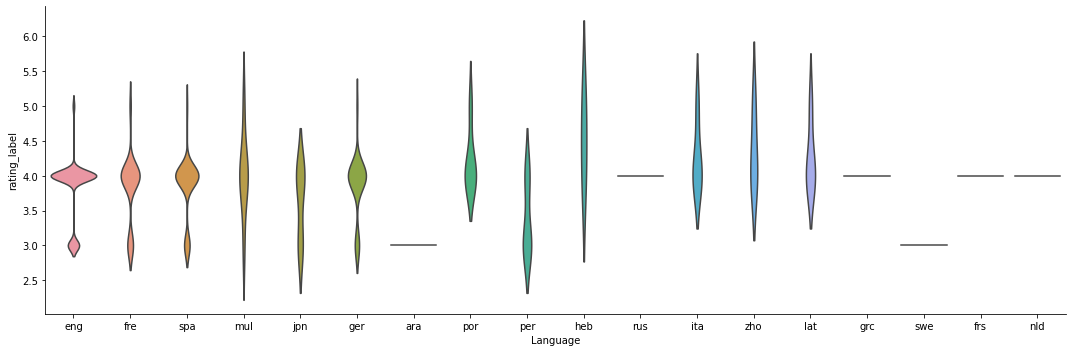

In [70]:
sns.catplot(
    data=train[["Language", "rating_label"]],
    x="Language", y="rating_label",
    kind="violin", height=5, aspect=3, inner=None
)
plt.show()

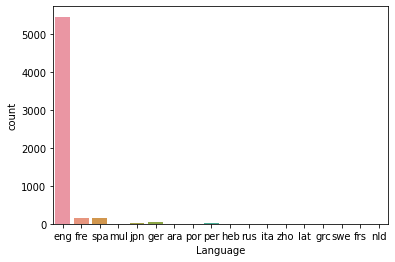

In [71]:
sns.countplot(x=train["Language"])
plt.show()

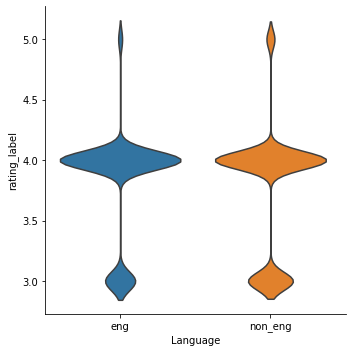

In [72]:
eng_ratings = train[train["Language"] == "eng"]["rating_label"].to_frame()
eng_ratings["Language"] = "eng"

non_eng_ratings = train[train["Language"] != "eng"]["rating_label"].to_frame()
non_eng_ratings["Language"] = "non_eng"

sns.catplot(
    data=pd.concat([eng_ratings, non_eng_ratings]),
    x="Language", y="rating_label",
    kind="violin", height=5, aspect=1, inner=None,
)
plt.show()

## 2. Publish Year/Month/Day

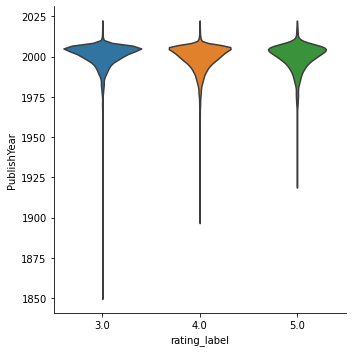

In [73]:
sns.catplot(
    data=train[["PublishYear", "rating_label"]],
    x="rating_label", y="PublishYear",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

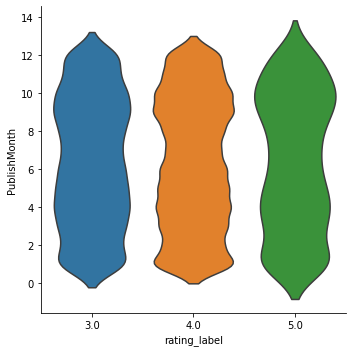

In [74]:
sns.catplot(
    data=train[["PublishMonth", "rating_label"]],
    x="rating_label", y="PublishMonth",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

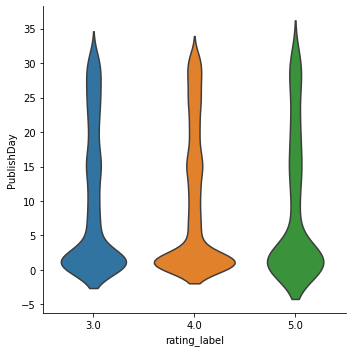

In [75]:
sns.catplot(
    data=train[["PublishDay", "rating_label"]],
    x="rating_label", y="PublishDay",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

## 3. Pages Number

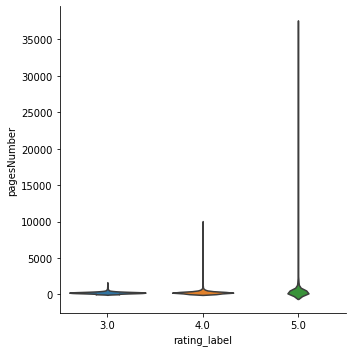

In [76]:
sns.catplot(
    data=train[["pagesNumber", "rating_label"]],
    x="rating_label", y="pagesNumber",
    kind="violin", height=5, aspect=1, inner=None
)
plt.show()

## 4. Publisher

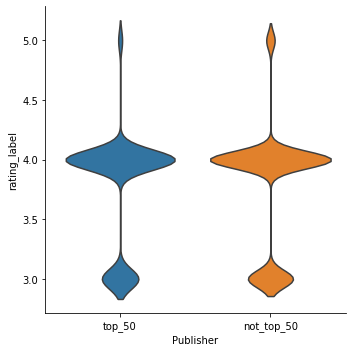

In [77]:
train["Publisher"] = train["Publisher"].fillna('')
top_50_publishers = set(train["Publisher"].value_counts()[:50].index)

rating_top_50_publishers = train[train["Publisher"].isin(top_50_publishers)]["rating_label"].to_frame()
rating_top_50_publishers["Publisher"] = "top_50"

rating_not_top_50_publishers = train[~train["Publisher"].isin(top_50_publishers)]["rating_label"].to_frame()
rating_not_top_50_publishers["Publisher"] = "not_top_50"

sns.catplot(
    data=pd.concat([rating_top_50_publishers, rating_not_top_50_publishers]),
    x="Publisher", y="rating_label",
    kind="violin", height=5, aspect=1, inner=None,
)
plt.show()

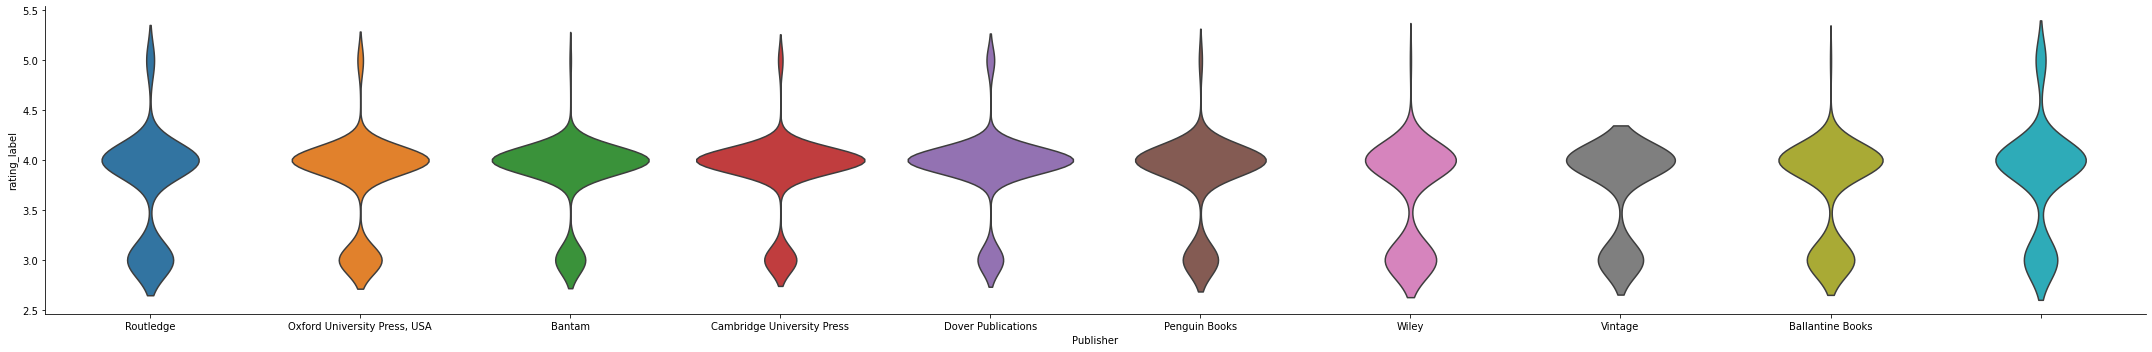

In [78]:
top_10_publishers = set(train["Publisher"].value_counts()[:10].index)
train_top_10_publishers = train[train["Publisher"].isin(top_10_publishers)]

sns.catplot(
    data=train_top_10_publishers,
    x="Publisher", y="rating_label",
    kind="violin", height=5, aspect=6, inner=None,
)
plt.show()

# Data Preprocessing

In [79]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def split_X_y(train):
    train_y = train.pop("rating_label")
    train_X = train
    return train_X, train_y

def join_doc2vec(X, name_doc2vec, authors_docvec, desc_doc2vec):
    X = pd.concat([X, name_doc2vec, authors_docvec, desc_doc2vec], axis=1, join='inner')
    X = X.drop(columns=["Name", "Authors",  "Description"])
    return X

def drop_columns(data_X, predict_X, columns):
    data_X = data_X.drop(columns=columns)
    predict_X = predict_X.drop(columns=columns)
    return data_X, predict_X

def normalise(train_X, test_X, predict_X):
    train_publisher, test_publisher, predict_publisher = train_X.pop("Publisher"), test_X.pop("Publisher"), predict_X.pop("Publisher")
    scaler = StandardScaler().fit(train_X)
    column_names = list(train_X.columns)
    train_X = pd.DataFrame(scaler.transform(train_X), columns=column_names)
    test_X = pd.DataFrame(scaler.transform(test_X), columns=column_names)
    predict_X = pd.DataFrame(scaler.transform(predict_X), columns=column_names)
    train_X = pd.concat([train_X, train_publisher], axis=1)
    test_X = pd.concat([test_X, test_publisher], axis=1)
    predict_X = pd.concat([predict_X, predict_publisher], axis=1)
    return train_X, test_X, predict_X

def encode_publisher(train_X, test_X, predict_X):
    train_X["Publisher"] = train_X["Publisher"].fillna('')
    top_50_publishers = set(train_X["Publisher"].value_counts().nlargest(50).index)

    train_X.loc[~train_X["Publisher"].isin(top_50_publishers), "Publisher"] = "other"
    test_X.loc[~test_X["Publisher"].isin(top_50_publishers), "Publisher"] = "other"
    predict_X.loc[~predict_X["Publisher"].isin(top_50_publishers), "Publisher"] = "other"

    publisher_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
    train_publisher_encoded = publisher_encoder.fit_transform(train_X[["Publisher"]])
    test_publisher_encoded = publisher_encoder.transform(test_X[["Publisher"]])
    predict_publisher_encoded = publisher_encoder.transform(predict_X[["Publisher"]])

    publisher_column_names = [f"publisher{n}" for n in range(51)]
    train_publisher_encoded = pd.DataFrame(train_publisher_encoded, columns=publisher_column_names)
    test_publisher_encoded = pd.DataFrame(test_publisher_encoded, columns=publisher_column_names)
    predict_publisher_encoded = pd.DataFrame(predict_publisher_encoded, columns=publisher_column_names)
    train_X = pd.concat([train_X, train_publisher_encoded], axis=1)
    test_X = pd.concat([test_X, test_publisher_encoded], axis=1)
    predict_X = pd.concat([predict_X, predict_publisher_encoded], axis=1)
    

    train_X = train_X.drop(columns="Publisher")
    test_X = test_X.drop(columns="Publisher")
    predict_X = predict_X.drop(columns="Publisher")
    return train_X, test_X, predict_X

def feature_select(train_X, train_y, test_X, predict_X):
    score_func = partial(mutual_info_classif, discrete_features=["publisher" in name for name in train_X.columns])
    selector = SelectKBest(score_func, k=150).fit(train_X, train_y)
    column_names = selector.get_feature_names_out()
    train_X = pd.DataFrame(selector.transform(train_X), columns=column_names)
    test_X = pd.DataFrame(selector.transform(test_X), columns=column_names)
    predict_X = pd.DataFrame(selector.transform(predict_X), columns=column_names)
    return train_X, test_X, predict_X

In [80]:
from sklearn.model_selection import train_test_split
from functools import partial

data = train
data_X, data_y = split_X_y(data)

data_X = join_doc2vec(data_X, train_authors_doc2vec, train_desc_doc2vec, train_name_doc2vec)
predict_X = join_doc2vec(predict_X, test_authors_doc2vec, test_desc_doc2vec, test_name_doc2vec)

data_X, predict_X = drop_columns(data_X, predict_X, ["Language"])
#test is held out for evaluation
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=928, stratify=data_y)
train_X, test_X, train_y, test_y = train_X.reset_index(drop=True), test_X.reset_index(drop=True), train_y.reset_index(drop=True), test_y.reset_index(drop=True)

train_X_normalised, test_X_normalised, predict_X_normalised = train_X.copy(), test_X.copy(), predict_X.copy()

train_X_normalised, test_X_normalised, predict_X_normalised = normalise(train_X_normalised, test_X_normalised, predict_X_normalised)

train_X, test_X, predict_X = encode_publisher(train_X, test_X, predict_X)
train_X_normalised, test_X_normalised, predict_X_normalised = encode_publisher(train_X_normalised, test_X_normalised, predict_X_normalised)

train_X, test_X, predict_X = feature_select(train_X, train_y, test_X, predict_X)
train_X_normalised, test_X_normalised, predict_X_normalised = feature_select(train_X_normalised, train_y, test_X_normalised, predict_X_normalised)

In [81]:
train_final = pd.concat([train_X, train_y], axis=1)
train_final_normalised = pd.concat([train_X_normalised, train_y], axis=1)
test_final = pd.concat([test_X, test_y], axis=1)
test_final_normalised = pd.concat([test_X_normalised, test_y], axis=1)
predict_final = predict_X
predict_final_normalised = predict_X_normalised

train_final.to_csv("train_final.csv", index=False)
test_final.to_csv("test_final.csv", index=False)
predict_final.to_csv("predict_final.csv", index=False)
train_final_normalised.to_csv("train_final_normalised.csv", index=False)
test_final_normalised.to_csv("test_final_normalised.csv", index=False)
predict_final_normalised.to_csv("predict_final_normalised.csv", index=False)

In [82]:
# from imblearn.over_sampling import SMOTENC
# from imblearn.under_sampling import RandomUnderSampler
# # print(list(train_X.columns))
# # print(list(train_X_normalised.columns))
# # sm = SMOTENC([("publisher" in name) for name in train_X], random_state=29837)
# sm = RandomUnderSampler(random_state=42, sampling_strategy='majority')
# resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
# resmapled_X_normalised, resmapled_y_normalised = sm.fit_resample(train_X_normalised, train_y)

### Baseline Computation

In [83]:
from sklearn import metrics

def report(a, b):
    reports = [
                metrics.accuracy_score(a, b), 
                metrics.precision_score(a, b, average="macro"),
                metrics.recall_score(a, b, average="macro"),
                metrics.f1_score(a, b, average="macro")
               ]
    return reports

test_df = pd.read_csv("test_final.csv")
test_X = test_df.loc[:, test_df.columns!='rating_label']
test_y = test_df['rating_label']

In [84]:
predict_val = test_y.mode()
report(test_y, [predict_val for i in test_y.index])

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.7027964448298287,
 0.2342654816099429,
 0.3333333333333333,
 0.2751538298323785]